In [1]:
import os
import pandas as pd
import numpy as np
import PIL
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import load_model,save_model
from keras.callbacks import ModelCheckpoint
from matplotlib.patches import Rectangle
import os
from scipy.misc import imsave

import keras

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.applications import xception
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Input, Lambda
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import BatchNormalization
from math import sqrt
from keras.callbacks import History 
import gc
from numpy.random import randint, choice
import numpy.random as rng

import keras.backend as K

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.preprocessing import image

def read_img(filepath, size,grayscale=True):
    
    if grayscale == True:
        img = image.load_img((filepath), target_size=size,grayscale=True)
    else:
        img = image.load_img((filepath), target_size=size,grayscale=False)
    img = image.img_to_array(img,data_format='channels_last')
    return img

In [3]:
trainFolder = "/home/rsk/Documents/FL/faceRecognition/orl_faces/TRAIN"
testFolder = "/home/rsk/Documents/FL/faceRecognition/orl_faces/TEST"

In [4]:
input_dim = (50,50,1)
imgSize=(50,50)

In [5]:
subjectList = os.listdir(trainFolder)

for i in range(len(subjectList)):
    
    newPath = os.path.join(trainFolder,subjectList[i])
    fileList = os.listdir(newPath)
    print("{} : {}".format(subjectList[i], len(fileList)))
    

s38 : 8
s39 : 8
s6 : 8
s23 : 8
s25 : 8
s4 : 8
s30 : 8
s37 : 8
s35 : 8
s11 : 8
s27 : 8
s31 : 8
s22 : 8
s36 : 8
s9 : 8
s8 : 8
s16 : 8
s15 : 8
s32 : 8
s18 : 8
s5 : 8
s1 : 8
s40 : 8
s19 : 8
s26 : 8
s17 : 8
s10 : 8
s21 : 8
s24 : 8
s34 : 8
s33 : 8
s3 : 8
s14 : 8
s2 : 8
s13 : 8
s29 : 8
s7 : 8
s28 : 8
s12 : 8
s20 : 8


### Creating Test Data

In [13]:
# ## Creating test files
# numTestFiles = 2

# for i in range(len(subjectList)):
    
#     trainPath = os.path.join(trainFolder,subjectList[i])
#     testPath =  os.path.join(testFolder,subjectList[i])
    
#     fileList = os.listdir(newPath)
#     testFiles = list(np.random.choice(fileList,numTestFiles))
    
    
#     if os.path.exists(testPath) == False:
#         os.mkdir(testPath)
    
#     for i in range(numTestFiles):
        
#         path1 =  os.path.join(trainPath,testFiles[i])
#         path2 =  os.path.join(testPath,testFiles[i])
        
#         !mv $path1 $path2
        

        

mv: cannot stat '/home/rsk/Documents/FL/faceRecognition/orl_faces/TRAIN/s1/5.pgm': No such file or directory
mv: cannot stat '/home/rsk/Documents/FL/faceRecognition/orl_faces/TRAIN/s21/6.pgm': No such file or directory


In [15]:
subjectList = os.listdir(testFolder)

for i in range(len(subjectList)):
    
    newPath = os.path.join(testFolder,subjectList[i])
    fileList = os.listdir(newPath)
    print("{} : {}".format(subjectList[i], len(fileList)))
    

s38 : 2
s39 : 2
s6 : 2
s23 : 2
s25 : 2
s4 : 2
s30 : 2
s37 : 2
s35 : 2
s11 : 2
s27 : 2
s31 : 2
s22 : 2
s36 : 2
s9 : 2
s8 : 2
s16 : 2
s15 : 2
s32 : 2
s18 : 2
s5 : 2
s1 : 2
s40 : 2
s19 : 2
s26 : 2
s17 : 2
s10 : 2
s21 : 2
s24 : 2
s34 : 2
s33 : 2
s3 : 2
s14 : 2
s2 : 2
s13 : 2
s29 : 2
s7 : 2
s28 : 2
s12 : 2
s20 : 2


### Visualizing images

(200, 200, 1)


TypeError: Invalid dimensions for image data

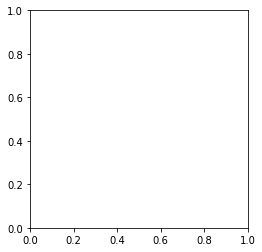

In [6]:
w = read_img(os.path.join(trainFolder,subjectList[0],'2.pgm') , (200,200))
print(w.shape)
plt.imshow(w/255.0,cmap='gray')

### Generator Class

#### Generator 1

In [ ]:
class Generator:
    
    def __init__(self,numSubjects):
        
        self.posSampleProb = np.repeat(1/30.0,30)
        self.posSampleList = np.repeat(1.0,30)
        
        
        
        self.negSampleNames=[]

        for x in range(len(folderList)-1):
            for y in range(x+1,len(folderList)):
                self.negSampleNames.append(str(x)+'_'+str(y))

        self.negSampleProb = np.repeat(1.0/len(self.negSampleNames),len(self.negSampleNames))
        self.negSampleList = np.repeat(1.0,len(self.negSampleNames))
        
    
    
    def updateProb(self):
    
        newPosProb = np.zeros(self.posSampleProb.shape)

        for i in range(len(self.posSampleProb)):
            newPosProb[i] =  sum(self.posSampleList) - self.posSampleList[i]
            
#             newPosProb[i] = max(0.0,1.0/len(self.posSampleProb) - newPosProb[i])
        newPosProb = newPosProb/sum(newPosProb)
        self.posSampleProb = newPosProb


        newNegProb = np.zeros(self.negSampleProb.shape)

        for i in range(len(self.negSampleProb)):
            newNegProb[i] = sum(self.negSampleList) - self.negSampleList[i]
#             newNegProb[i] = max(0.0,1.0/len(self.negSampleProb) - newNegProb[i])
        newNegProb = newNegProb/sum(newNegProb)
        self.negSampleProb = newNegProb
        
    
    def getBatch(self,batchSize):
    

        posSamples = batchSize/2 + batchSize%2
        negSamples = batchSize - posSamples

#         print(self.posSampleProb)
#         print(self.negSampleProb)
    
        #positiveSamples 
        posPairList = []
        posFolder = choice(len(folderList),p=self.posSampleProb)

        imgList = os.listdir(os.path.join(trainPath,folderList[posFolder]))

        for x in range(len(imgList)-1):
            for y in range(x+1, len(imgList)):

                img1 = read_img(os.path.join(trainPath,folderList[posFolder],imgList[x]) , imgSize)
                img2 = read_img(os.path.join(trainPath,folderList[posFolder],imgList[y]) , imgSize)


                posPairList.append(((img1,img2),1))

                if len(posPairList) == posSamples:
                    break

        self.posSampleList[posFolder] += posSamples


        #negativeSamples
        negPairList = []



        for i in range(negSamples):
            folderNo = choice(len(self.negSampleNames),p=self.negSampleProb)
            negFolder = self.negSampleNames[folderNo]

            x,y = int(negFolder.split("_")[0]),int(negFolder.split("_")[0])

            imgList1 = os.listdir(os.path.join(trainPath,folderList[x]))
            imgList2 = os.listdir(os.path.join(trainPath,folderList[y]))

            img1 = read_img(os.path.join(trainPath,folderList[x],imgList1[choice(len(imgList1))]) , imgSize)
            img2 = read_img(os.path.join(trainPath,folderList[y],imgList2[choice(len(imgList2))]) , imgSize)

            negPairList.append(((img1,img2),0))

            self.negSampleList[folderNo]+=1

            if len(negPairList) == negSamples:
                break

        self.updateProb()

        pairList = posPairList + negPairList


        inputAimgs = np.array([x[0][0] for x in pairList])
        inputBimgs = np.array([x[0][1] for x in pairList])
        target = np.array([x[1] for x in pairList])        

        return( [inputAimgs,inputBimgs], target)
    
    
    def generate(self, batch_size, s="train"):
        """a generator for batches, so model.fit_generator can be used. """
        while True:
            pairs, targets = self.getBatch(batch_size,s)
            yield (pairs, targets) 
    
    


#### Generator 2

In [12]:
class Generator:
    
    def __init__(self,numSubjects,imgSize):
        
        self.numSubjects = numSubjects
        self.folderList = os.listdir(trainFolder)[:numSubjects]
        print(self.folderList)
        self.imgSize = imgSize
        
        

    def getBatch(self,batchSize, posRatio = 0.5, shuffleSubjects = True):
    
        
        posSamples = int(batchSize*posRatio)
        negSamples = batchSize - posSamples
        
        posFile = open('/home/rsk/Documents/Projects/GenericModels/SiameseNetworks/posSamples.csv','a+')
        negFile = open('/home/rsk/Documents/Projects/GenericModels/SiameseNetworks/negSamples.csv','a+')

        #positiveSamples 
        posPairList = []
            
        posFolder = choice(len(self.folderList))

        for i in range(posSamples):
            
            if shuffleSubjects==True:
                posFolder = choice(len(self.folderList))

            imgList = os.listdir(os.path.join(trainFolder,self.folderList[posFolder]))

            selectedFiles = np.random.choice(imgList, 2)

            img1 = read_img(os.path.join(trainFolder,self.folderList[posFolder],selectedFiles[0]) , self.imgSize)
            img2 = read_img(os.path.join(trainFolder,self.folderList[posFolder],selectedFiles[1]) , self.imgSize)

            posPairList.append(((img1,img2),1))
            posFile.writelines(str(self.folderList[posFolder])+","+str(self.folderList[posFolder])+"\n")
                

        #negativeSamples
        negPairList = []

        if shuffleSubjects==True:
            
            for i in range(negSamples):
                folders = list(choice(self.folderList, 2,replace=False))

                imgList1 = os.listdir(os.path.join(trainFolder,folders[0]))
                imgList2 = os.listdir(os.path.join(trainFolder,folders[1]))

                img1 = read_img(os.path.join(trainFolder,folders[0],imgList1[choice(len(imgList1))]) , self.imgSize)
                img2 = read_img(os.path.join(trainFolder,folders[1],imgList2[choice(len(imgList2))]) , self.imgSize)
                
                negPairList.append(((img1,img2),0))
                negFile.writelines(str(folders[0])+","+str(folders[1])+"\n")
                

            

        pairList = posPairList + negPairList
    
        negFile.close()
        posFile.close()

        inputAimgs = np.array([x[0][0] for x in pairList])
        inputBimgs = np.array([x[0][1] for x in pairList])
        target = np.array([x[1] for x in pairList])        

        return( [inputAimgs,inputBimgs], target)
    
    
    def generate(self, batch_size, s="train"):
        """a generator for batches, so model.fit_generator can be used. """
        while True:
            pairs, targets = self.getBatch(batch_size,posRatio=0.5, shuffleSubjects=True)
            yield (pairs, targets) 
    
    


In [46]:
a = Generator(10,(45,45))

['s38', 's39', 's6', 's23', 's25', 's4', 's30', 's37', 's35', 's11']


In [47]:
e=a.getBatch(10)

/home/rsk/Documents/FL/faceRecognition/orl_faces/TRAIN/s23
/home/rsk/Documents/FL/faceRecognition/orl_faces/TRAIN/s39
/home/rsk/Documents/FL/faceRecognition/orl_faces/TRAIN/s39
/home/rsk/Documents/FL/faceRecognition/orl_faces/TRAIN/s11
/home/rsk/Documents/FL/faceRecognition/orl_faces/TRAIN/s30
['s25', 's35']
['s39', 's37']
['s6', 's25']
['s6', 's38']
['s35', 's4']


In [73]:
os.getcwd()

'/home/rsk/Documents/FL/faceRecognition/orl_faces/TRAIN/s11'

In [79]:
posFile = open('/home/rsk/Documents/Projects/GenericModels/SiameseNetworks/posSamples.csv','a+')
posFile.writelines("dfd,fdf\n")
posFile.writelines("dfd,fda\n")
posFile.close()

### Helper Functions

In [78]:
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

def compute_accuracy(predictions, labels):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return labels[predictions.ravel() < 0.5].mean()

def W_init(shape,name=None):
    """Initialize weights as in paper"""
    values = rng.normal(loc=0,scale=1e-2,size=shape)
    return K.variable(values,name=name)
#//TODO: figure out how to initialize layer biases in keras.

def b_init(shape,name=None):
    """Initialize bias as in paper"""
    values=rng.normal(loc=0.5,scale=1e-2,size=shape)
    return K.variable(values,name=name)

In [79]:
baseModel = Sequential()
baseModel.add(BatchNormalization(input_shape = input_dim))
baseModel.add(Conv2D(64, (5,5),activation='relu', data_format='channels_last',kernel_initializer=W_init,strides=(2,2)))
baseModel.add(MaxPooling2D())

baseModel.add(Dropout(0.3))
baseModel.add(Conv2D(128, (5,5),activation='relu',kernel_initializer=W_init, bias_initializer=b_init, strides=(2,2)))
baseModel.add(Dropout(0.3))
baseModel.add(Conv2D(256, (3,3),activation='relu',kernel_initializer=W_init, bias_initializer=b_init))
baseModel.add(Flatten())
baseModel.add(Dense(256, activation='relu'))
# baseModel.add(Dense(32, activation='relu'))


inputA = Input(shape = input_dim)
inputB = Input(shape = input_dim)

outputA = baseModel(inputA)
outputB = baseModel(inputB)

#Extracting data
# inputAimgs = np.array([x[0][0] for x in superList])
# inputBimgs = np.array([x[0][1] for x in superList])
# target = np.array([x[1] for x in superList])

In [80]:
baseModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 50, 50, 1)         4         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 23, 23, 64)        1664      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 128)         204928    
_________________________________________________________________
dropout_10 (Dropout)         (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 256)         295168    
__________

In [81]:
distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([outputA,outputB])

model = Model(input=[inputA, inputB], output=distance)


tboard = keras.callbacks.TensorBoard(log_dir='/home/rsk/Documents/Projects/GenericModels/SiameseNetworks/Graph', histogram_freq=0,
                            write_graph=True, write_images=True)

model.compile(loss=contrastive_loss,optimizer='adadelta')


/home/rsk/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("la..., inputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
gen = Generator(40, imgSize)

['s38', 's39', 's6', 's23', 's25', 's4', 's30', 's37', 's35', 's11', 's27', 's31', 's22', 's36', 's9', 's8', 's16', 's15', 's32', 's18', 's5', 's1', 's40', 's19', 's26', 's17', 's10', 's21', 's24', 's34', 's33', 's3', 's14', 's2', 's13', 's29', 's7', 's28', 's12', 's20']


In [83]:
model.fit_generator(gen.generate(30),epochs=13,steps_per_epoch = 250,callbacks=[tboard])

Epoch 1/13
250/250 [==============================] - 4s 16ms/step - loss: 0.1517
Epoch 2/13
250/250 [==============================] - 3s 14ms/step - loss: 0.0963
Epoch 3/13
250/250 [==============================] - 3s 14ms/step - loss: 0.0797
Epoch 4/13
250/250 [==============================] - 3s 14ms/step - loss: 0.0687
Epoch 5/13
250/250 [==============================] - 4s 14ms/step - loss: 0.0598
Epoch 6/13
250/250 [==============================] - 4s 14ms/step - loss: 0.0517
Epoch 7/13
250/250 [==============================] - 4s 15ms/step - loss: 0.0488
Epoch 8/13
250/250 [==============================] - 4s 15ms/step - loss: 0.0461
Epoch 9/13
250/250 [==============================] - 4s 15ms/step - loss: 0.0424
Epoch 10/13
250/250 [==============================] - 4s 15ms/step - loss: 0.0385
Epoch 11/13
250/250 [==============================] - 3s 14ms/step - loss: 0.0346
Epoch 12/13
250/250 [==============================] - 3s 13ms/step - loss: 0.0343
Epoch 13/13
2

In [18]:
gen.folderList

['s38',
 's39',
 's6',
 's23',
 's25',
 's4',
 's30',
 's37',
 's35',
 's11',
 's27',
 's31',
 's22',
 's36',
 's9',
 's8',
 's16',
 's15',
 's32',
 's18',
 's5',
 's1',
 's40',
 's19',
 's26',
 's17',
 's10',
 's21',
 's24',
 's34']

## Testing

In [68]:
def predictBest(img,imgSupport,model,returnPreds = False):
    
    bestPred=3.0
    bestLabel=''
    bestImg = 0
    predList = []

    
    for i in range(len(imgSupport)):
        pred = model.predict([img.reshape(1,imgSize[0],imgSize[1],1), imgSupport[i][0].reshape(1,imgSize[0],imgSize[1],1)])
        predList.append([list(pred[0])[0], imgSupport[i][1]])
#         print("label : {}  Pred : {}".format(imgSupport[i][1], pred))
        
        
        if pred<bestPred:
            bestPred = pred
            bestLabel = imgSupport[i][1]
            bestImg = imgSupport[i][0]
    
    if returnPreds == True:
        return(predList)
    
    return(bestLabel)


def predictBest(img, imgSupport, model, returnPreds = False, verbose = False):
    
    bestPred = 1000.0
    bestLabel =''
    bestImg = 0
    predList = []
    
    folderList = list(imgSupport.keys())
    
    for folder in folderList:
        
        classPreds = []
        
        for j in range(len(imgSupport[folder])):
            testImg = imgSupport[folder][j]
            
            pred = model.predict([img.reshape(1,imgSize[0],imgSize[1],1), testImg.reshape(1,imgSize[0],imgSize[1],1)])
            
            classPreds.append(pred)
            
        
        avgClassPred = np.mean(classPreds)
        predList.append((folder, avgClassPred))
        
#         if verbose:
#             print("Class {} : {} ".format(folder, avgClassPred))
        
        if avgClassPred < bestPred:
            bestLabel = folder
            bestPred = avgClassPred
        
    if verbose:
        
        predList = sorted(predList , key = lambda x : x[1])
        
        for i in range(len(predList)):
            print("Class {} : {}".format(predList[i][0],predList[i][1]))
        
        
        print("Best Class : {}".format(bestLabel))
        print("------------------")
        
    return bestLabel
            
            
            
        
    
    

def getSupportImgs(path, subjectList = gen.folderList):
    
    supportImg=[]
    
    os.chdir(path)
    folderList = os.listdir("./")
    
    for folder in subjectList:
        os.chdir(os.path.join(path,folder))
        imgList = os.listdir("./")
        
        img = read_img(os.path.join(path,folder,choice(imgList)), imgSize)
        supportImg.append([img,folder])
        
    return(supportImg)


def getSupportImgs(path, subjectList = gen.folderList, numImages = 8):
    
    supportImg = {}
    
    os.chdir(path)
    folderList = os.listdir("./")
    
    for folder in subjectList:
        os.chdir(os.path.join(path,folder))
        
        imgList = os.listdir("./")
        
        
        supports = []
        
        chosenImgs = list(np.random.choice(imgList, numImages, replace=False))
        
        for i in range(numImages):
            img = read_img(os.path.join(path,folder,chosenImgs[i]), imgSize)
            supports.append(img)
            
        supportImg[folder] = supports
        
    return supportImg

def predictFolder(folder,model):
    """
    Predicts the images of a single subject
    """
    
    
    imgList = os.listdir(folder)
    pred = []
    
    for i in range(len(imgList)):
        
        img = read_img(os.path.join(folder,imgList[i]), imgSize)
        imgSupport = getSupportImgs(trainFolder, gen.folderList)
        
        
        best = predictBest(img, imgSupport, model,verbose=False)
        pred.append(best)
        
    return(pred)

def predictTestFolder(model,individualAccuracy = True):
    """
    Makes predictions for all test subjects
    """
    
    subjectList = gen.folderList
    
    totalPred = 0.0
    totalCorrectPred = 0.0
    
    for subject in subjectList:
        preds = predictFolder(os.path.join(testFolder,subject), model)
        correctPred = preds.count(subject)
        classAccuracy = float(correctPred)/len(preds)
        
        totalPred += len(preds)
        totalCorrectPred += correctPred
        
        if individualAccuracy == True:
            print("{} : Class Accuracy : {}".format(subject,classAccuracy))
            
    
    totalAccuracy = float(totalCorrectPred)/totalPred
    
    print("Total Accuracy : {}".format(totalAccuracy))
          

def plotSimiliarSubjects(imgPath, similarSubjects):
    
    img = read_img(imgPath, (150,150,3),grayscale = False)
    
    plt.figure(figsize=(15,60))
    plt.subplot(161)
    plt.imshow(img/255.0)
    
    for i in range(len(similarSubjects)):
        folder = os.path.join(testFolder,similarSubjects[i])
        path = os.path.join(folder, os.listdir(folder)[0])
        img = read_img(path, (150,150,3), grayscale = False)
        plt.subplot(1*100+6*10+(i+2))
        plt.imshow(img/255.0)
        


In [32]:
help(sorted)

Help on built-in function sorted in module __builtin__:

sorted(...)
    sorted(iterable, cmp=None, key=None, reverse=False) --> new sorted list



In [74]:
predictFolder(os.path.join(testFolder,"s35"), model)

['s35', 's35']

In [75]:
predictTestFolder(model)

s38 : Class Accuracy : 1.0
s39 : Class Accuracy : 1.0
s6 : Class Accuracy : 1.0
s23 : Class Accuracy : 1.0
s25 : Class Accuracy : 1.0
s4 : Class Accuracy : 1.0
s30 : Class Accuracy : 1.0
s37 : Class Accuracy : 1.0
s35 : Class Accuracy : 1.0
s11 : Class Accuracy : 1.0
s27 : Class Accuracy : 1.0
s31 : Class Accuracy : 1.0
s22 : Class Accuracy : 1.0
s36 : Class Accuracy : 1.0
s9 : Class Accuracy : 1.0
s8 : Class Accuracy : 1.0
s16 : Class Accuracy : 1.0
s15 : Class Accuracy : 1.0
s32 : Class Accuracy : 1.0
s18 : Class Accuracy : 1.0
s5 : Class Accuracy : 1.0
s1 : Class Accuracy : 1.0
s40 : Class Accuracy : 1.0
s19 : Class Accuracy : 1.0
s26 : Class Accuracy : 1.0
s17 : Class Accuracy : 1.0
s10 : Class Accuracy : 1.0
s21 : Class Accuracy : 1.0
s24 : Class Accuracy : 1.0
s34 : Class Accuracy : 1.0
s33 : Class Accuracy : 1.0
s3 : Class Accuracy : 1.0
s14 : Class Accuracy : 1.0
s2 : Class Accuracy : 1.0
s13 : Class Accuracy : 1.0
s29 : Class Accuracy : 1.0
s7 : Class Accuracy : 1.0
s28 : Clas

In [77]:
model.save('/home/rsk/Documents/Projects/GenericModels/SiameseNetworks/FaceModels/margin1_support10_acc1.0.hdf5')

In [76]:
model.save_weights('/home/rsk/Documents/Projects/GenericModels/SiameseNetworks/FaceModels/margin1_support10_acc1.0_weights.hdf5')

In [253]:
def getSimilarSubjects(testSubject, testSample , model, mostSimilar=True):
    
    imgList = os.listdir(os.path.join(testFolder,testSubject))
    
    img = read_img(os.path.join(testFolder,testSubject,imgList[testSample]), imgSize)
    imgSupport = getSupportImgs(trainFolder, gen.folderList)
    
    predList = predictBest(img, imgSupport,model=model, returnPreds = True)
    
    predList.sort(key = lambda x : x[0])
    
    predList =np.array(predList)
    
    if mostSimilar==True:
        topSimiliar = predList[:5,1]
    else:
        #Selects most dissimilar subjects
        topSimiliar = predList[-5:,1]
    
    plotSimiliarSubjects(os.path.join(testFolder,testSubject,imgList[testSample]) , topSimiliar)
    

    
    

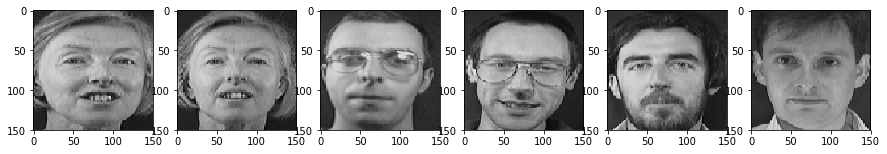

In [254]:
x=getSimilarSubjects("s32",1,model,mostSimilar=True)

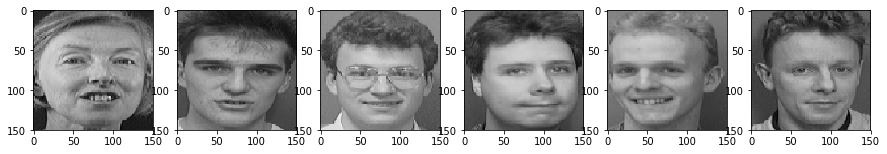

In [255]:
x=getSimilarSubjects("s32",1,model,mostSimilar=False)

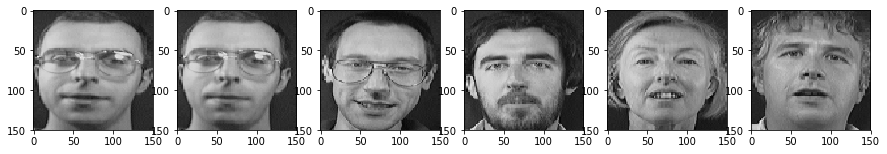

In [258]:
x=getSimilarSubjects("s19",1,model,mostSimilar=True)

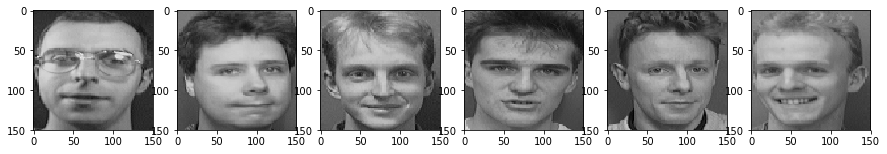

In [259]:
x=getSimilarSubjects("s19",1,model,mostSimilar=False)